In [ ]:
## This notebook can be run on Google Colab and it downloads the data from the GDrive folder and then can be used for further tasks.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Downloading the data from the gdrive folder
import gdown

file_id = "1tQWDWvwJiIkt9KJu50pu6i0lnWQOU_lj"
output_file = "data_file.zip"

gdown.download(f"https://drive.google.com/uc?id={file_id}", output_file)

# unzip the data file
!unzip data_file.zip

Downloading...
From (original): https://drive.google.com/uc?id=1tQWDWvwJiIkt9KJu50pu6i0lnWQOU_lj
From (redirected): https://drive.google.com/uc?id=1tQWDWvwJiIkt9KJu50pu6i0lnWQOU_lj&confirm=t&uuid=0df78230-96cf-45d8-95e8-536895d2b043
To: /content/data_file.zip
100%|██████████| 236M/236M [00:03<00:00, 77.0MB/s]


Archive:  data_file.zip
  inflating: pos_100k_R100.csv       


In [ ]:
# Downloading the wavelength array
file_id = "1zBE7p6t_bhBnSuG-sx5lSyrUXlzvYAD-"
output_file = "wavelength.npy"
gdown.download(f"https://drive.google.com/uc?id={file_id}", output_file)
wv = np.load(output_file)
wv.shape

Downloading...
From: https://drive.google.com/uc?id=1zBE7p6t_bhBnSuG-sx5lSyrUXlzvYAD-
To: /content/wavelength.npy
100%|██████████| 2.28k/2.28k [00:00<00:00, 6.17MB/s]


(269,)

In [ ]:
# Reading the Data from the csv file containing the spectra and the parameters
file_path = '/content/pos_100k_R100.csv'
data = np.genfromtxt(file_path, delimiter=',',skip_header=1)


In [ ]:
data.shape # First 269 columns are the spectrum points and the remaining 11 are the input parameters

(98977, 280)

In [ ]:
# List of the parameters
param_list = ['R_s', 'R_p', 'g_p', 'Temp', 'log_kappa_cloud', 'log_P_cloud','logH2O','logCO2','logCO','logCH4','logNH3']


In [ ]:
# Data shown in tabular format
df1 = pd.DataFrame(data[0:,:269])
df2 = pd.DataFrame(data[0:,269:], columns=param_list)
df = pd.concat([df1, df2], axis=1)
df

,0,1,2,3,4,5,6,7,8,9,...,R_p,g_p,Temp,log_kappa_cloud,log_P_cloud,logH2O,logCO2,logCO,logCH4,logNH3
0,0.004014,0.004014,0.004014,0.004014,0.004014,0.004014,0.004014,0.004014,0.004014,0.004014,...,1.658348,17.176982,3327.875478,-3.855474,-3.844470,-8.889865,-4.018888,-3.195541,-7.868857,-5.895533
1,0.000107,0.000107,0.000107,0.000107,0.000107,0.000107,0.000107,0.000107,0.000107,0.000107,...,0.258443,16.036432,2034.071133,-3.014919,-2.962217,-3.225697,-2.038615,-5.329029,-3.169883,-3.206833
2,0.000358,0.000358,0.000358,0.000358,0.000357,0.000357,0.000357,0.000357,0.000357,0.000357,...,0.503774,9.066010,1712.661454,-2.246068,-1.677456,-3.993484,-2.895214,-7.397882,-8.908273,-7.172669
3,0.012516,0.012516,0.012516,0.012516,0.012516,0.012516,0.012515,0.012515,0.012515,0.012515,...,0.562965,7.254639,3287.260930,-1.086659,-3.761693,-8.448541,-3.301345,-4.516020,-7.289866,-7.753208
4,-0.001460,-0.001460,-0.001461,-0.001461,-0.001461,-0.001462,-0.001462,-0.001462,-0.001462,-0.001462,...,0.144485,8.543504,1674.394288,-1.410270,-3.851043,-3.656284,-3.879207,-7.050328,-8.809873,-2.528554
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
98972,0.051244,0.051231,0.051218,0.051204,0.051189,0.051176,0.051165,0.051157,0.051161,0.051157,...,1.127280,23.840443,1888.494072,-0.852804,0.174308,-8.328901,-4.306115,-5.311498,-4.732160,-2.606973
98973,0.013549,0.013549,0.013549,0.013549,0.013549,0.013549,0.013549,0.013549,0.013549,0.013549,...,0.821014,39.964869,608.918946,-0.080777,-2.934876,-2.272423,-5.898074,-4.111940,-6.111954,-5.232814
98974,0.028945,0.028936,0.028931,0.028919,0.028914,0.028910,0.028905,0.028909,0.028904,0.028898,...,1.585554,21.984786,1662.144409,-5.621292,-0.207594,-2.164336,-5.986446,-4.369003,-3.304317,-8.281498
98975,0.004606,0.004605,0.004604,0.004602,0.004601,0.004600,0.004599,0.004598,0.004596,0.004595,...,1.523560,21.601466,2205.683764,-2.764175,0.358894,-3.131075,-5.491361,-3.416492,-4.298408,-5.343337


In [ ]:
# parameters shown in the tabular format
df2.describe()

,R_s,R_p,g_p,Temp,log_kappa_cloud,log_P_cloud,logH2O,logCO2,logCO,logCH4,logNH3
count,98977.000000,98977.000000,98977.000000,98977.000000,98977.000000,98977.000000,98977.000000,98977.000000,98977.000000,98977.000000,98977.000000
mean,1.752016,1.058256,22.642903,1992.402089,-3.203369,-1.505786,-5.496968,-5.491061,-5.500920,-5.499664,-5.509308
std,0.722140,0.544215,10.052727,866.570249,2.187390,1.445765,2.021663,2.020888,2.027795,2.023343,2.020685
min,0.500010,0.100042,5.000412,500.059513,-6.999982,-3.999971,-8.999924,-8.999969,-8.999911,-8.999990,-8.999985
25%,1.125879,0.589184,13.975458,1240.715643,-5.087846,-2.761596,-7.249788,-7.239416,-7.265151,-7.259838,-7.263001
50%,1.756622,1.058429,22.677670,1988.640986,-3.214978,-1.502844,-5.488894,-5.486002,-5.500252,-5.502037,-5.509423
75%,2.377127,1.530419,31.312269,2740.352495,-1.317016,-0.255407,-3.753484,-3.741905,-3.740820,-3.745031,-3.764704
max,2.999994,1.999990,39.999593,3499.933503,0.599861,0.999957,-2.000011,-2.000260,-2.000041,-2.000107,-2.000021


,R_s,R_p,g_p,Temp,log_kappa_cloud,log_P_cloud,logH2O,logCO2,logCO,logCH4,logNH3
0,2.833887,1.658348,17.176982,3327.875478,-3.855474,-3.84447,-8.889865,-4.018888,-3.195541,-7.868857,-5.895533


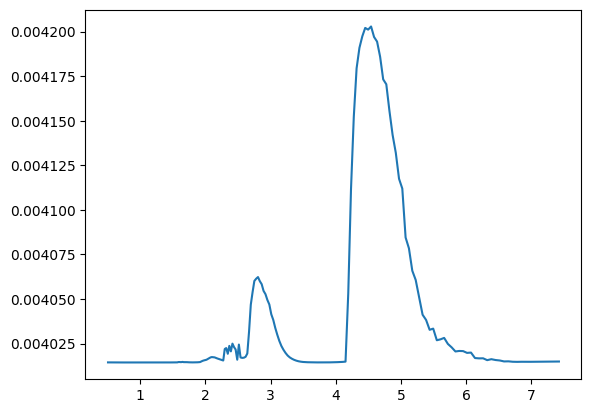

In [ ]:
#plotting some models from the data and printing their the parameters
plt.plot(wv, data[0,:269])
df2.iloc[0:1]

,R_s,R_p,g_p,Temp,log_kappa_cloud,log_P_cloud,logH2O,logCO2,logCO,logCH4,logNH3
10,2.8469,0.201887,38.415076,2617.19217,0.155491,0.757226,-6.018024,-5.179912,-6.229619,-6.433908,-3.485862


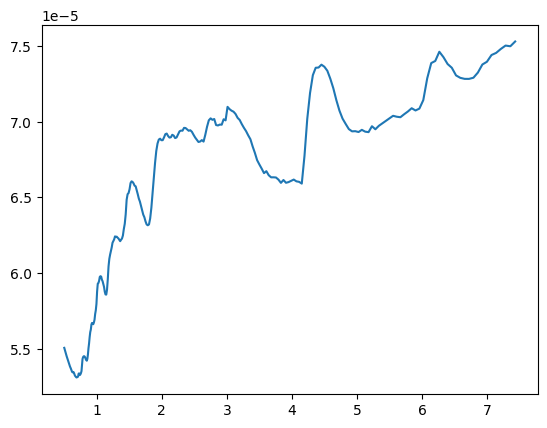

In [ ]:
plt.plot(wv, data[10,:269])
df2.iloc[10:11]

## Nan values

In [ ]:
file_id = "1Zvmp_IcDezI0r5GdNYxIJbAZRm7R_TKZ"
output_file = "nan_spec.csv"

gdown.download(f"https://drive.google.com/uc?id={file_id}", output_file)

Downloading...
From: https://drive.google.com/uc?id=1Zvmp_IcDezI0r5GdNYxIJbAZRm7R_TKZ
To: /content/nan_spec.csv
100%|██████████| 491k/491k [00:00<00:00, 51.8MB/s]


'nan_spec.csv'

In [ ]:
# Reading the Data from the csv file containing the nan spectra and the parameters
file_path = '/content/nan_spec.csv'
nan_spec = np.genfromtxt(file_path, delimiter=',',skip_header=1)
nan_spec.shape

(1023, 280)

In [ ]:
df_nan = pd.DataFrame(nan_spec)
df_nan

,0,1,2,3,4,5,6,7,8,9,...,270,271,272,273,274,275,276,277,278,279
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.122700,9.180338,1891.872987,-2.134221,-1.356703,-2.033879,-2.573061,-8.776394,-6.514325,-3.216702
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.111224,5.398719,1035.491424,-0.940024,-3.421902,-7.079381,-3.607805,-3.131906,-2.090837,-3.039004
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.346015,5.170609,3451.355509,-6.280547,-1.543213,-3.171775,-3.915062,-2.671073,-8.165481,-7.479186
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.208265,5.528287,3387.366641,-3.748407,0.642347,-4.038501,-3.576778,-7.546525,-6.853445,-3.476399
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.149362,6.013503,2590.385980,-3.524562,-0.211654,-6.862394,-7.100121,-4.995013,-6.510036,-5.175212
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1018,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.125739,14.884427,3143.909991,0.282002,0.030235,-7.805598,-5.227164,-6.004621,-6.989429,-4.302435
1019,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.114233,13.622647,3396.261648,-1.577598,-3.392444,-5.072474,-7.609585,-6.041865,-4.594143,-4.080657
1020,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.154009,7.228467,3170.929628,-2.220342,-1.994172,-4.837217,-8.204524,-5.141604,-5.048891,-4.317835
1021,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.128298,15.609942,3428.280041,-1.307000,-0.286617,-8.955974,-5.271007,-7.606164,-8.113109,-5.568030


In [ ]:
df_nan_params = df_nan.iloc[:,269:]
df_nan_params.columns = param_list
df_nan_params

,R_s,R_p,g_p,Temp,log_kappa_cloud,log_P_cloud,logH2O,logCO2,logCO,logCH4,logNH3
0,1.425832,0.122700,9.180338,1891.872987,-2.134221,-1.356703,-2.033879,-2.573061,-8.776394,-6.514325,-3.216702
1,2.664433,0.111224,5.398719,1035.491424,-0.940024,-3.421902,-7.079381,-3.607805,-3.131906,-2.090837,-3.039004
2,0.779378,0.346015,5.170609,3451.355509,-6.280547,-1.543213,-3.171775,-3.915062,-2.671073,-8.165481,-7.479186
3,1.651332,0.208265,5.528287,3387.366641,-3.748407,0.642347,-4.038501,-3.576778,-7.546525,-6.853445,-3.476399
4,2.765821,0.149362,6.013503,2590.385980,-3.524562,-0.211654,-6.862394,-7.100121,-4.995013,-6.510036,-5.175212
...,...,...,...,...,...,...,...,...,...,...,...
1018,1.455775,0.125739,14.884427,3143.909991,0.282002,0.030235,-7.805598,-5.227164,-6.004621,-6.989429,-4.302435
1019,1.049901,0.114233,13.622647,3396.261648,-1.577598,-3.392444,-5.072474,-7.609585,-6.041865,-4.594143,-4.080657
1020,1.281296,0.154009,7.228467,3170.929628,-2.220342,-1.994172,-4.837217,-8.204524,-5.141604,-5.048891,-4.317835
1021,1.983528,0.128298,15.609942,3428.280041,-1.307000,-0.286617,-8.955974,-5.271007,-7.606164,-8.113109,-5.568030


In [ ]:
df_nan_params.describe()

,R_s,R_p,g_p,Temp,log_kappa_cloud,log_P_cloud,logH2O,logCO2,logCO,logCH4,logNH3
count,1023.000000,1023.000000,1023.000000,1023.000000,1023.000000,1023.000000,1023.000000,1023.000000,1023.000000,1023.000000,1023.000000
mean,1.691929,0.170281,8.553479,2746.912223,-3.162021,-1.637057,-5.511985,-5.591635,-5.625860,-5.529238,-5.451740
std,0.719176,0.065898,3.153450,575.737296,2.214597,1.443316,2.025266,2.002680,1.987854,1.962096,2.014078
min,0.501305,0.100066,5.002164,984.081462,-6.992376,-3.985996,-8.988526,-8.998791,-8.988467,-8.984881,-8.981018
25%,1.088446,0.120286,6.002916,2359.473801,-5.162177,-2.886900,-7.221871,-7.397411,-7.266374,-7.150110,-7.214253
50%,1.611493,0.148621,7.684678,2866.282927,-3.185231,-1.729956,-5.559761,-5.496422,-5.599718,-5.632709,-5.366510
75%,2.331892,0.201613,10.164136,3229.214499,-1.237813,-0.412954,-3.764850,-3.874522,-3.970852,-3.875018,-3.740691
max,2.999715,0.473942,22.085728,3499.963403,0.599163,0.997443,-2.001054,-2.000824,-2.012682,-2.015739,-2.003450


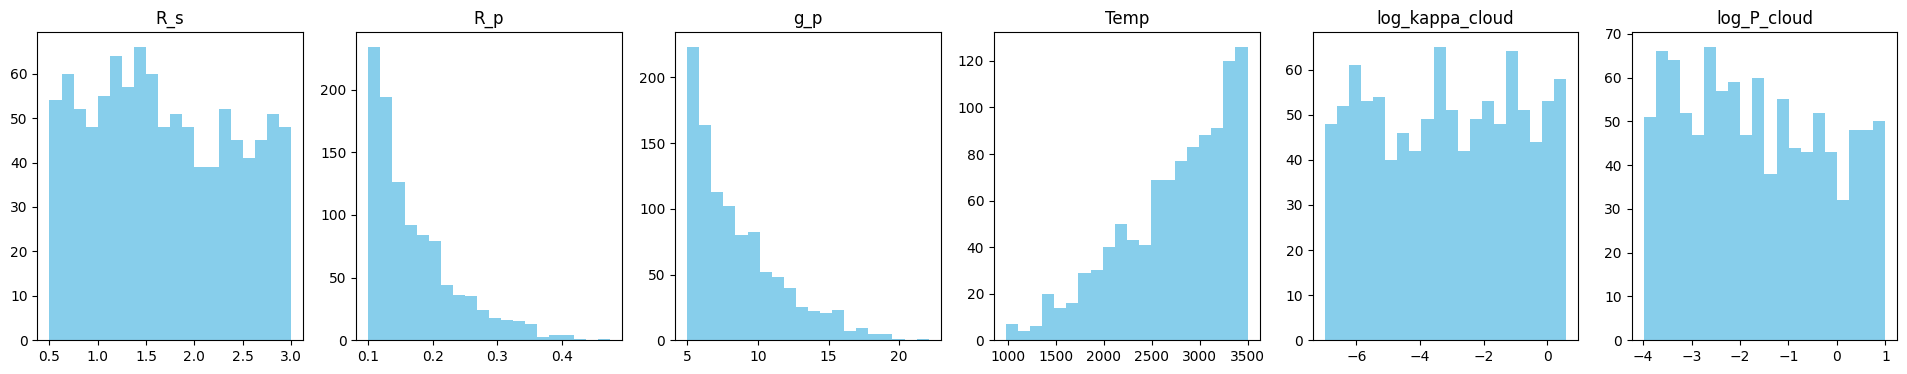

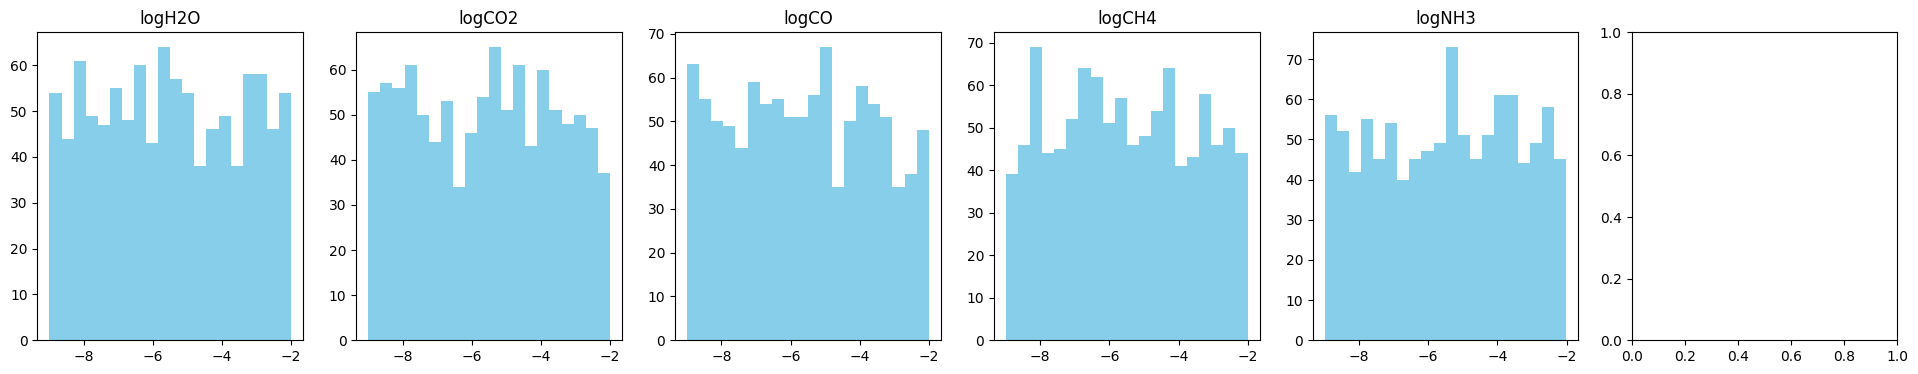

In [ ]:
# Checking the distibution of the parameters for which the spectra is NAN.

param_keys = ['R_s', 'R_p', 'g_p', 'Temp', 'log_kappa_cloud', 'log_P_cloud', 'logH2O', 'logCO2', 'logCO', 'logCH4', 'logNH3']

# the frequency vs value histograms of the planet parameters and cloud params
fig, axs = plt.subplots(1, 6, figsize=(24, 4))
for i in range(6):
        axs[i].hist(df_nan_params[param_keys[i]], bins=20, color='skyblue')
        axs[i].set_title(param_keys[i])
plt.show()

# the frequency vs value histograms of the mixing parameters
fig, axs = plt.subplots(1, 6, figsize=(24, 4))
for i in range(6,11):
        axs[i-6].hist(df_nan_params[param_keys[i]], bins=20, color='skyblue')
        axs[i-6].set_title(param_keys[i])
plt.show()

We can see that most of the NAN values are due to low values of Rp (Rp < 0.2Rj)

## Negative and Zero values of transit depth

For some parameters we got negative and zero transit depth (?).

In [ ]:
tr_spec = df.iloc[:,:269].to_numpy()
neg_indx = np.where(np.any(tr_spec <= 0, axis=1))[0]
neg_indx.shape

(313,)

In [ ]:
df_neg = df.iloc[neg_indx,:]
# df_neg

In [ ]:
df_neg.iloc[:,269:]

,R_s,R_p,g_p,Temp,log_kappa_cloud,log_P_cloud,logH2O,logCO2,logCO,logCH4,logNH3
4,0.834865,0.144485,8.543504,1674.394288,-1.410270,-3.851043,-3.656284,-3.879207,-7.050328,-8.809873,-2.528554
108,2.730240,0.188024,12.216515,3299.226669,-1.472325,0.812290,-3.855517,-2.886924,-7.127354,-8.899784,-2.727458
1248,0.944883,0.113239,20.039202,3247.872894,-1.952475,-0.179178,-2.081849,-3.085098,-6.433928,-5.421849,-8.221484
1354,2.061703,0.117520,12.687764,2128.185253,-5.012125,-0.315695,-3.596142,-6.507048,-2.112176,-2.633064,-5.004891
1535,2.798879,0.118781,11.388924,1895.802865,-3.270584,-1.459143,-2.199337,-2.988439,-8.016974,-5.637691,-3.405652
...,...,...,...,...,...,...,...,...,...,...,...
97234,2.216807,0.179798,10.315152,2607.980896,-4.651448,-1.135441,-2.399702,-4.176137,-5.165386,-5.436317,-4.001579
97376,2.877359,0.122758,12.545757,1941.546905,-0.936007,-0.890469,-5.015347,-3.081165,-4.278640,-8.726509,-3.520317
97427,0.992188,0.134157,10.307194,1839.060404,-0.775477,-1.429758,-7.659384,-8.676260,-8.871158,-6.378710,-5.362381
98360,2.395913,0.160088,12.452693,3019.517383,-4.637370,-3.637056,-4.722317,-7.792936,-2.005335,-8.172649,-5.980228


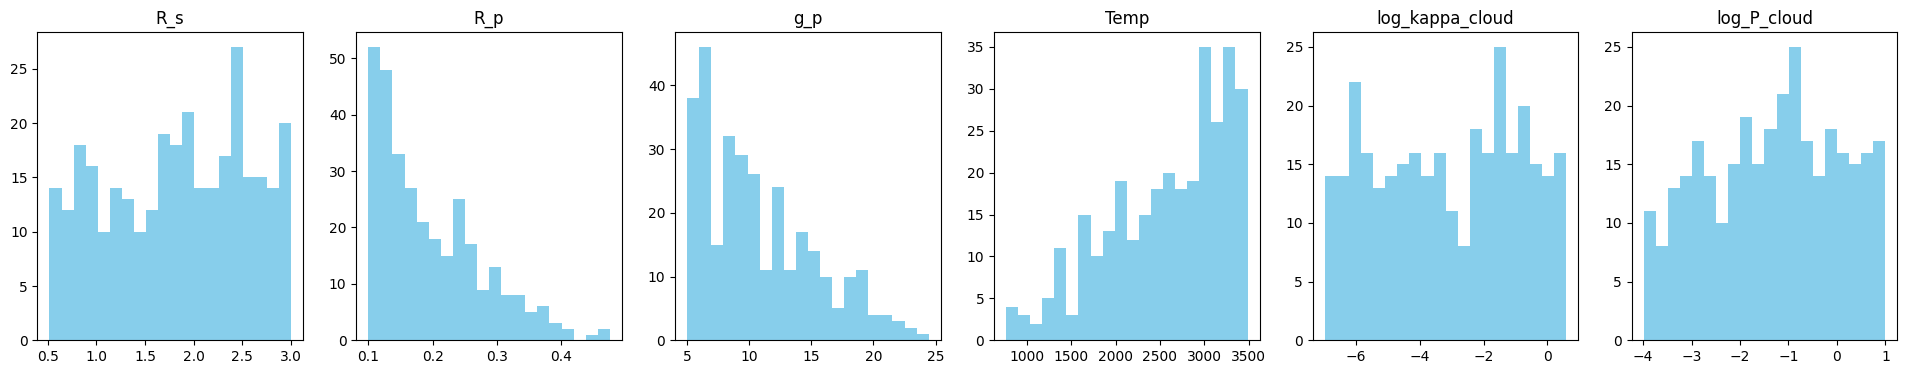

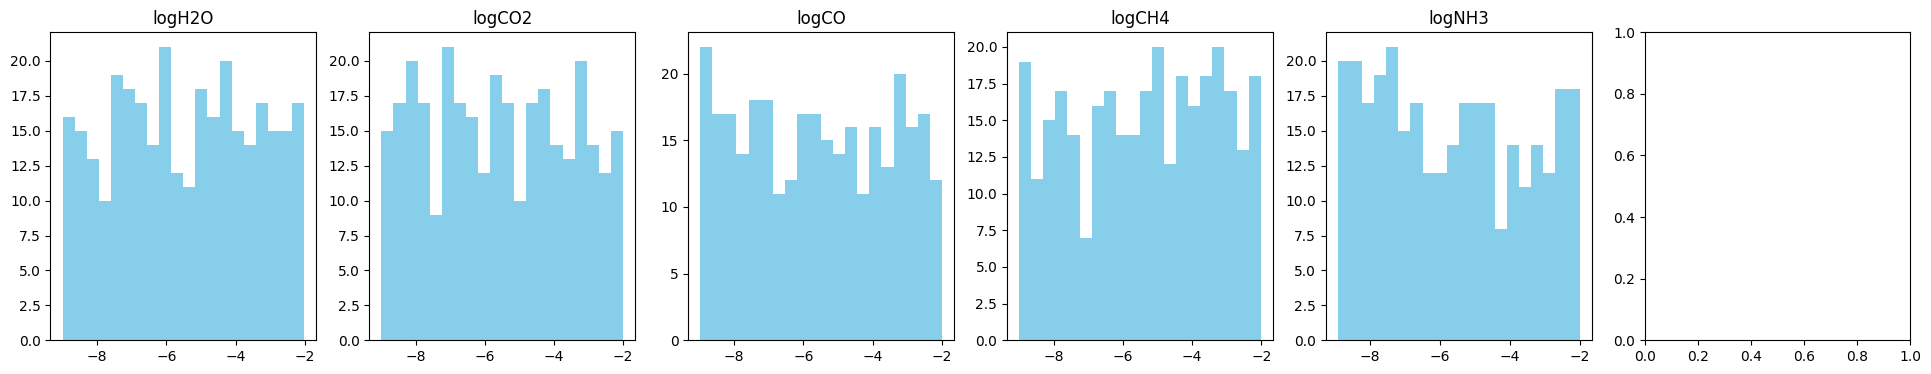

In [ ]:
# Checking the distibution of the parameters for which the spectra is ZERO or NEGATIVE.

param_keys = ['R_s', 'R_p', 'g_p', 'Temp', 'log_kappa_cloud', 'log_P_cloud', 'logH2O', 'logCO2', 'logCO', 'logCH4', 'logNH3']

# the frequency vs value histograms of the planet parameters and cloud params
fig, axs = plt.subplots(1, 6, figsize=(24, 4))
for i in range(6):
        axs[i].hist(df_neg[param_keys[i]], bins=20, color='skyblue')
        axs[i].set_title(param_keys[i])
plt.show()

# the frequency vs value histograms of the mixing parameters
fig, axs = plt.subplots(1, 6, figsize=(24, 4))
for i in range(6,11):
        axs[i-6].hist(df_neg[param_keys[i]], bins=20, color='skyblue')
        axs[i-6].set_title(param_keys[i])
plt.show()

## Final data

In [ ]:
df_final = df[(df.iloc[:,:269] > 0).all(1)]
df_final

,0,1,2,3,4,5,6,7,8,9,...,R_p,g_p,Temp,log_kappa_cloud,log_P_cloud,logH2O,logCO2,logCO,logCH4,logNH3
0,0.004014,0.004014,0.004014,0.004014,0.004014,0.004014,0.004014,0.004014,0.004014,0.004014,...,1.658348,17.176982,3327.875478,-3.855474,-3.844470,-8.889865,-4.018888,-3.195541,-7.868857,-5.895533
1,0.000107,0.000107,0.000107,0.000107,0.000107,0.000107,0.000107,0.000107,0.000107,0.000107,...,0.258443,16.036432,2034.071133,-3.014919,-2.962217,-3.225697,-2.038615,-5.329029,-3.169883,-3.206833
2,0.000358,0.000358,0.000358,0.000358,0.000357,0.000357,0.000357,0.000357,0.000357,0.000357,...,0.503774,9.066010,1712.661454,-2.246068,-1.677456,-3.993484,-2.895214,-7.397882,-8.908273,-7.172669
3,0.012516,0.012516,0.012516,0.012516,0.012516,0.012516,0.012515,0.012515,0.012515,0.012515,...,0.562965,7.254639,3287.260930,-1.086659,-3.761693,-8.448541,-3.301345,-4.516020,-7.289866,-7.753208
5,0.001427,0.001427,0.001427,0.001427,0.001427,0.001427,0.001427,0.001427,0.001427,0.001427,...,0.745250,35.230361,2895.010899,-1.323324,-1.794849,-8.350682,-4.666140,-6.680365,-6.197769,-5.475105
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
98972,0.051244,0.051231,0.051218,0.051204,0.051189,0.051176,0.051165,0.051157,0.051161,0.051157,...,1.127280,23.840443,1888.494072,-0.852804,0.174308,-8.328901,-4.306115,-5.311498,-4.732160,-2.606973
98973,0.013549,0.013549,0.013549,0.013549,0.013549,0.013549,0.013549,0.013549,0.013549,0.013549,...,0.821014,39.964869,608.918946,-0.080777,-2.934876,-2.272423,-5.898074,-4.111940,-6.111954,-5.232814
98974,0.028945,0.028936,0.028931,0.028919,0.028914,0.028910,0.028905,0.028909,0.028904,0.028898,...,1.585554,21.984786,1662.144409,-5.621292,-0.207594,-2.164336,-5.986446,-4.369003,-3.304317,-8.281498
98975,0.004606,0.004605,0.004604,0.004602,0.004601,0.004600,0.004599,0.004598,0.004596,0.004595,...,1.523560,21.601466,2205.683764,-2.764175,0.358894,-3.131075,-5.491361,-3.416492,-4.298408,-5.343337


In [ ]:
spec_unique = np.unique(df_final.iloc[:,:269])
spec_unique.shape

(26540614,)

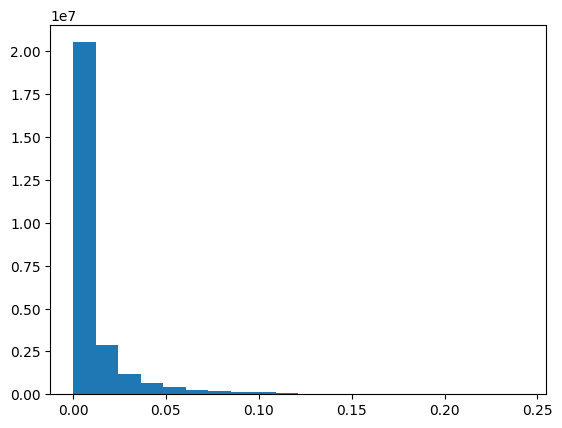

In [ ]:
plt.hist(spec_unique, bins=20)
plt.show()

In [ ]:
np.min(spec_unique), np.max(spec_unique)

(3.4220194403291445e-08, 0.24272990429643776)